<a href="https://colab.research.google.com/github/ZachGermain/DSPS_zgermain/blob/master/DSPS_HW2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Written by Federica B. Bianco @fedhere
UDel DSPS 2019

Zachariah Germain

In [0]:
from __future__ import print_function, division
import numpy as np
import scipy as sp
from scipy import stats
import pylab as pl
%pylab inline
pl.style.use("https://raw.githubusercontent.com/fedhere/DSPS/master/fbb.mplstyle")


Populating the interactive namespace from numpy and matplotlib


# Homework 1: Maxwell Boltzmann distribution

In Physics, statistics can help us describe the macroscopic behavior of a system if we know its microscopic properties in a statistical sense. We cannot know the motion of each molecule in a gas, but we can know the distribution of their velocities and positions.   In the mid to late 1800s, James Clerk Maxwell and Ludwig Boltzmann modeled the *distribution of speed of molecules in a gas*. As you probably know, and can intuitive realize, the speed of the molecules depends on the temperature of the gas, which is a macroscopic property, i.e. the velocity of the molecules is different for different gas temperatures. **This distribution is called the Maxwell-Boltzmann distribution.**


It turns out that the Maxwel-Boltzmann distribution is a special case of the *Chi distribution* with 3 degrees of freedom, and with a scale parameter corresponding to the temperature in some way. 

Below I have created 3 distributions. Based on the description above


# 1) label the axis in the plot, 

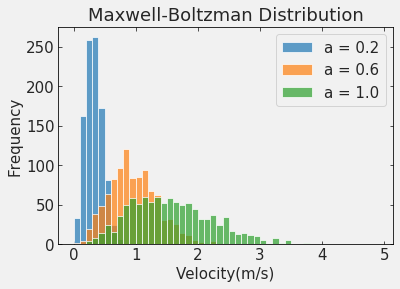

In [0]:
np.random.randn(123)
fig, ax = pl.subplots()
for a in [0.2, 0.6, 1.0]:
    ax.hist(sp.stats.chi.rvs(df=3, scale=a, size=1000), # could as well be sp.stats.maxwell.rvs(scale=a, size=1000)
          bins=np.arange(0,5,0.1), alpha=0.7,
       label="a = %.1f"%a);

pl.legend();

#Axis Labels
pl.xlabel("Velocity(m/s)");
pl.ylabel("Frequency");
pl.title("Maxwell-Boltzman Distribution");

# 2) knowing that the *scale* parameter $a$  is a function of the temperature  *T*, and that the dependency is to a power 1/2, which is correct: 
   **$a \propto \sqrt{T}$**  or **$a \propto \sqrt{1/T}$**? 
 

Your answer here: **$a \propto \sqrt{T}$**


# 3) What is the mean of all three distributions. How does it compare to the most probable molecular speed? 
From the wikipedia page of the Chi distribution find the formula of the mean of the Chi distribution. The distribution we are using has a scale parameter *a* in addition to the number of degrees of freedom. The mean scales linearly with this parameter:

$\mu_{\mathrm{MB}, k, a} = a \cdot \mu_{\mathrm{chi}, k}$

Using the scipy function ```sp.special.gamma()```  calculate the gamma $\Gamma$ function,

**calculate the mean of all three distributions. How does it compare to the most probable molecular speed.**

In [0]:
meanMB = [0, 0, 0,];
a = [0.2, 0.6, 1.0];
for i in range(0,3):
  meanMB[i] = a[i]*np.sqrt(2)*sp.special.gamma(2)/sp.special.gamma(1.5)

print ("a=0.2 - mu=", meanMB[0], "\n")
print ("a=0.6 - mu=", meanMB[1], "\n")
print ("a=1.0 - mu=", meanMB[2], "\n")

a=0.2 - mu= 0.31915382432114625 

a=0.6 - mu= 0.9574614729634385 

a=1.0 - mu= 1.595769121605731 



Judging by the histograms produced, **$\mu_{MB,k,a}$** the means of each distribution is slightly greater than the most probably molecular speed, or mode, of the distributions.

This really only holds for perfect gasses, which means under 4 assumptions: 
- the diameter of the molecules is much smaller than the distance between them
- the collisions between molecules conserve energy
- the molecules do not interact between collisions and are not subject to any other forces (move at constant speed in a straight line)
- the initial position and velocity are random.

# Extra Credit:

can you create a python (2D) simulation where the molecules behave as describe and calculate their speed evolution from an initial speed that is gaussian distributed? (rather hard!!)


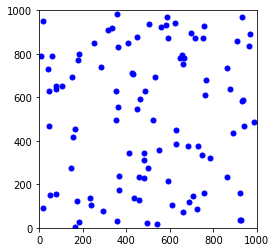

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

particles = {}
numParticles = 100;
boxLength = 1000;
for i in range(0,numParticles):
    particles[i]={}
np.random.seed(700)
for i in range(0,numParticles):
    particles[i]['xpos'] = np.random.rand()*boxLength
    particles[i]['ypos'] = np.random.rand()*boxLength
    particles[i]['xvel'] = np.random.normal()*50
    particles[i]['yvel'] = np.random.normal()*50

def mv(t, partID):
    particles[partID]['xpos'] += particles[partID]['xvel']*t
    particles[partID]['ypos'] += particles[partID]['yvel']*t
    
def move(t):
    for i in particles:
        mv(t, i)
        
def collideWall():
    for i in particles:
        if particles[i]['xpos']<=2 or particles[i]['xpos']>=boxLength-2:
            particles[i]['xvel']*=-1
        if particles[i]['ypos']<=2 or particles[i]['ypos']>=boxLength-2:
            particles[i]['yvel']*=-1

def distCalc(part1, part2):
    return np.sqrt((particles[part1]['xpos']-particles[part2]['xpos'])**2+
                   (particles[part1]['ypos']-particles[part2]['ypos'])**2)

def collideCalc(i,j):
    #val1 = np.sqrt((particles[i]['xvel'])**2+
                   #(particles[i]['yvel'])**2)
    #val2 = np.sqrt((particles[j]['xvel'])**2+
                   #(particles[j]['yvel'])**2)
    #print([val1, val2])
    vel1XDiff = particles[i]['xvel'] - particles[j]['xvel']
    vel1YDiff = particles[i]['yvel'] - particles[j]['yvel']
    pos1XDiff = particles[i]['xpos'] - particles[j]['xpos']
    pos1YDiff = particles[i]['ypos'] - particles[j]['ypos']
    vel1DiffArr = [vel1XDiff, vel1YDiff]
    pos1DiffArr = [pos1XDiff, pos1YDiff]
    vel1Arr = [particles[i]['xvel'], particles[i]['yvel']]
    coeff = (-1*np.dot(vel1DiffArr, pos1DiffArr))/np.dot(pos1DiffArr,pos1DiffArr)
    pos1Coeff = [pos1DiffArr[0]*coeff, pos1DiffArr[1]*coeff]
    vel1Fin = [vel1Arr[0]+pos1Coeff[0], vel1Arr[1]+pos1Coeff[1]]
    particles[i]['xvel'] = vel1Fin[0]
    particles[i]['yvel'] = vel1Fin[1]
    
    vel2XDiff = particles[j]['xvel'] - particles[i]['xvel']
    vel2YDiff = particles[j]['yvel'] - particles[i]['yvel']
    pos2XDiff = particles[j]['xpos'] - particles[i]['xpos']
    pos2YDiff = particles[j]['ypos'] - particles[i]['ypos']
    vel2DiffArr = [vel2XDiff, vel2YDiff]
    pos2DiffArr = [pos2XDiff, pos2YDiff]
    vel2Arr = [particles[j]['xvel'], particles[j]['yvel']]
    coeff = (-1*np.dot(vel2DiffArr, pos2DiffArr))/np.dot(pos2DiffArr,pos2DiffArr)
    pos2Coeff = [pos2DiffArr[0]*coeff, pos2DiffArr[1]*coeff]
    vel2Fin = [vel2Arr[0]+pos2Coeff[0], vel2Arr[1]+pos2Coeff[1]]
    particles[j]['xvel'] = vel2Fin[0]
    particles[j]['yvel'] = vel2Fin[1]
    
    #val1 = np.sqrt((particles[i]['xvel'])**2+
                   #(particles[i]['yvel'])**2)
    #val2 = np.sqrt((particles[j]['xvel'])**2+
                   #(particles[j]['yvel'])**2)
    #print([val1,val2])

def collideParticles():
    for i in particles:
        for j in particles:
            if i!=j:
                dist = distCalc(i,j)
                if dist <= 4:
                    collideCalc(i,j)
                    
def getXPos():
    xPos = []
    for i in particles:
        xPos.append(particles[i]['xpos'])
    return xPos

def getYPos():
    YPos = []
    for i in particles:
        YPos.append(particles[i]['ypos'])
    return YPos
        
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal', autoscale_on=True,
                     xlim=(0, boxLength), ylim=(0, boxLength))
particle, = ax.plot([], [], 'bo', ms=5)

def init():
    """initialize animation"""
    xPosInit = getXPos()
    yPosInit = getYPos()
    posInit = [xPosInit, yPosInit]
    particle.set_data(posInit)
    return particle,

def animate(i):
    """perform animation step"""
    ms = 2
    
    # update pieces of the animation
    move(1./30)
    collideWall()
    collideParticles()
    xPos = getXPos()
    yPos = getYPos()
    particle.set_data(xPos,yPos)
    particle.set_markersize(ms)
    return particle,

ani = animation.FuncAnimation(fig, animate, frames=600,
                              interval=10, blit=True, init_func=init)

#ani.save('Maxwell_Sim.htm', fps=30, extra_args=['-vcodec', 'libx264'])

Collission problem remains improperly solved. Only works if done with save line(last line) and on computer, I can't get animations working otherwise including codes for animations on the internet.